# Ordinary differential equations with Python


## Example 1 - Simple ODE

$$
\dot{x} = Ax
$$

where $\dot{x} = \frac{dx}{dt}, A = \frac{-1}{T}$

The solution is:
$$
x = e^{-At}x_0
$$

In [1]:
# import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import math 

from scipy.integrate import odeint

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline


[[1.        ]
 [0.81873077]
 [0.67032006]
 [0.54881165]
 [0.44932898]
 [0.36787947]
 [0.30119421]
 [0.24659696]
 [0.20189652]
 [0.16529888]
 [0.13533527]
 [0.11080315]
 [0.09071794]
 [0.07427357]
 [0.06081005]
 [0.04978706]
 [0.0407622 ]
 [0.03337327]
 [0.02732372]
 [0.02237077]
 [0.01831564]
 [0.01499558]
 [0.01227734]
 [0.01005184]
 [0.00822975]]


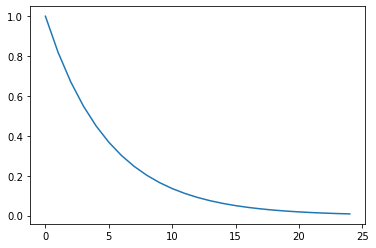

In [2]:
# Example 1

# Parameters
T = 5
A = -1/T

x0 = 1
tstart = 0
tend = 25
t = np.arange(tstart, tend, 1)
x0 = 1

# Return the differential
def derivative_p1(x, t, a):
    dx_dt = a*x
    return dx_dt

# Solve the ODE
x = odeint(derivative_p1, x0, t, args=(A,))
print(x)

# Plot the ODE
plt.plot(t, x)

## Multiple order equations

Given the equations:

$$
\frac{dx}{dt} = -y \\
\frac{dy}{dt} = x
$$

With initial conditions
$$
x(0) = 1, y(0) = 1
$$

In [6]:
# The intial conditions - in form of [x, y]
z0 = [1, 1]
tstart = -5
tend = 5
step = 0.1
t = np.arange(tstart, tend+1, step)

# The differential
def multiorder_diff(z, t):
    # x wrt t
    dxdt = -z[-1]

    # y wrt t
    dydt = z[0]

    dzdt = [dxdt, dydt]
    return dzdt

# Solve the equation
z = odeint(multiorder_diff, z0, t)
print(z)

[[ 1.          1.        ]
 [ 0.89517069  1.09483755]
 [ 0.78139719  1.17873587]
 [ 0.65981621  1.25085666]
 [ 0.5316426   1.31047928]
 [ 0.39815697  1.35700803]
 [ 0.2606931   1.38997801]
 [ 0.12062446  1.40905978]
 [-0.02064941  1.41406269]
 [-0.16171695  1.40493678]
 [-0.30116868  1.3817732 ]
 [-0.43761122  1.34480339]
 [-0.5696813   1.29439676]
 [-0.69605932  1.23105693]
 [-0.81548254  1.1554168 ]
 [-0.92675772  1.06823212]
 [-1.02877306  0.97037402]
 [-1.12050923  0.86282027]
 [-1.20104964  0.7466455 ]
 [-1.26958956  0.62301049]
 [-1.32544417  0.49315057]
 [-1.36805537  0.35836326]
 [-1.39699742  0.2199953 ]
 [-1.41198113  0.07942922]
 [-1.4128568  -0.0619305 ]
 [-1.39961568 -0.20267143]
 [-1.37239005 -0.34138733]
 [-1.33145196 -0.47669221]
 [-1.27721043 -0.60723413]
 [-1.21020744 -0.73170877]
 [-1.13111246 -0.84887242]
 [-1.04071578 -0.95755442]
 [-0.93992061 -1.05666885]
 [-0.82973406 -1.14522539]
 [-0.71125708 -1.22233922]
 [-0.58567346 -1.28723984]
 [-0.45423798 -1.33927879]
 

In [4]:
import plotly.graph_objs as go
import plotly.offline as py

In [7]:
# Plot the data:
x_data = z[:, 0]
y_data = z[:, 1]

# Plot
trace1 = go.Scatter(x=t, y=x_data, name='x(t)')
trace2 = go.Scatter(x=t, y=y_data, name='y(t)')

data = [trace1, trace2]

layout = go.Layout(title='Solution to the set of differential equations', xaxis_title = 't', yaxis_title = 'z(t)')
figure = go.Figure(data=data, layout=layout)
py.iplot(figure)

## Solving higher order differential equations

To solve:

$$
(1+t^2)w''+2tw'+3w = 2
$$

With initial conditions: $w(t_0) = 0, w'(t_0) = 1$

Rewrite in terms of the highest derivative:
$$
w'' = \frac{2 - 3w - 2tw'}{1+t^2}
$$

For solving using ODE, we must supply the equation into systems of first order. Let $w = x_1, and w' = x_2$

This results in:
$$
\dot{x_1}=x_2 \\
\dot{x_2} = \frac{2-3x_1-2tx_2}{1+t^2}
$$

The code can now be implemented as follows:

In [8]:
# Initialization:
tstart = 0
tend = 5
step = 0.1

# Initializing the condition in form: [x, x']
x_0 = [0, 1]

# the range of values
t = np.arange(tstart, tend, step)

# Return dx/dt
def differential(x, t):
    dx1dt = x[1]
    dx2dt = (2-3*x[0]-t*x[1]) / (1 + t**2)
    dxdt = [dx1dt, dx2dt]

    return dxdt

# Solve the equation
x = odeint(differential, x_0, t)
print(x)



[[ 0.          1.        ]
 [ 0.10927935  1.17788681]
 [ 0.23388103  1.30510208]
 [ 0.36844573  1.37691523]
 [ 0.5074666   1.39497232]
 [ 0.6458654   1.36588005]
 [ 0.77938549  1.29909945]
 [ 0.90477298  1.20492542]
 [ 1.01978093  1.09301113]
 [ 1.12305875  0.9715432 ]
 [ 1.21398735  0.84695145]
 [ 1.29250417  0.72396457]
 [ 1.35894373  0.6058427 ]
 [ 1.4139053   0.4946692 ]
 [ 1.45814958  0.39163453]
 [ 1.49252208  0.29728094]
 [ 1.51789849  0.21169891]
 [ 1.53514742  0.13467745]
 [ 1.54510606  0.06581494]
 [ 1.54856534  0.00459876]
 [ 1.54626177 -0.04953925]
 [ 1.5388739  -0.09718495]
 [ 1.52702188 -0.1389171 ]
 [ 1.51126903 -0.17529168]
 [ 1.49212462 -0.20683258]
 [ 1.47004736 -0.23402675]
 [ 1.44544918 -0.25732235]
 [ 1.41869916 -0.27712874]
 [ 1.39012731 -0.29381781]
 [ 1.36002826 -0.30772598]
 [ 1.32866466 -0.31915661]
 [ 1.29627039 -0.32838262]
 [ 1.26305343 -0.3356491 ]
 [ 1.22919854 -0.34117582]
 [ 1.19486967 -0.34515969]
 [ 1.16021213 -0.34777699]
 [ 1.12535455 -0.34918548]
 

In [10]:
# Split up
x1 = x[:, 0]
x2 = x[:, 1]

# Plot the curve
trace1 = go.Scatter(x=t, y=x1, name='x1(t)')
trace2 = go.Scatter(x=t, y=x2, name='x2(t)')

data = [trace1, trace2]

layout = go.Layout(title='Solution to the higher order differential equation',
                   xaxis_title='t', yaxis_title='x(t)')
figure = go.Figure(data=data, layout=layout)
py.iplot(figure)